In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# NN

In [2]:
np.random.seed(1232)
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\dep')
data = pd.read_csv("Rand_train.csv", sep=',')
data_val = pd.read_csv("Rand_valid.csv", sep=',')

In [3]:
data.cost = (np.exp(data.cost) - 0.5)*((data.cost != 0) * 1)
data_val.cost = (np.exp(data_val.cost) - 0.5)*((data_val.cost != 0) * 1)
data = shuffle(data).reset_index(drop=True)
data = data.drop(['fmde', 'lxghindx', 'lpi'], axis=1)
data_val = data_val.drop(['fmde', 'lxghindx', 'lpi'], axis=1)

In [4]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]
X_val = data_val.iloc[:,1:]
Y_val = data_val.iloc[:,0]

ranking = np.load('ranking.npy')

my_index = X.columns.values[ranking]
X2 = X[my_index]
X2_val = X_val[my_index]



## Classification

In [ ]:
Y_p = (Y == 0) * 1
Y_valp = (Y_val == 0) * 1

In [5]:
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\prog_calc')
from fit4_nn import fit

In [6]:
class Net1(nn.Module):
    def __init__(self, initial, final):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(initial, final)
        self.fc2 = nn.Linear(final, 1)                
                   
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [7]:
criterion = nn.BCELoss()

In [8]:
initial = X2.shape[1]
final = int(round(initial * 1.5, 0)) 

In [9]:
n_epochs = 1000
lr = 0.01
verbose = 1
n_batches = 6
batch_to_avg = 2
clipping = 0.25
PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining1.pt'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [10]:
net = Net1(initial, final)
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
    
a, b, c = fit(X2, X2_val, Y_p, Y_valp, net, optimizer, criterion, n_epochs, 
                    n_batches, batch_to_avg, lr, clipping, PATH, device, verbose)  

c:\users\rober\appdata\local\programs\python\python36\lib\site-packages\torch\nn\functional.py:2016: UserWarning: Using a target size (torch.Size([1073])) that is different to the input size (torch.Size([1073, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
c:\users\rober\appdata\local\programs\python\python36\lib\site-packages\torch\nn\functional.py:2016: UserWarning: Using a target size (torch.Size([1004])) that is different to the input size (torch.Size([1004, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Epoch 1: Training Loss: 0.7827579279740652, Validation Loss: 0.7592731714248657
New Checkpoint Saved into PATH
Epoch 2: Training Loss: 0.7483778993288676, Validation Loss: 0.7088706493377686
New Checkpoint Saved into PATH
Epoch 3: Training Loss: 0.6945424179236094, Validation Loss: 0.6484577059745789
New Checkpoint Saved into PATH
Epoch 4: Training Loss: 0.6339693864186605, Validation Loss: 0.5904793739318848
New Checkpoint Saved into PATH
Epoch 5: Training Loss: 0.5790773630142212, Validation Loss: 0.5430746078491211
New Checkpoint Saved into PATH
Epoch 6: Training Loss: 0.5369208951791128, Validation Loss: 0.5102515816688538
New Checkpoint Saved into PATH
Epoch 7: Training Loss: 0.5096871505180994, Validation Loss: 0.49295997619628906
New Checkpoint Saved into PATH
Epoch 8: Training Loss: 0.49854353070259094, Validation Loss: 0.4890305697917938
New Checkpoint Saved into PATH
Epoch 9: Training Loss: 0.49637646476427716, Validation Loss: 0.4893205463886261
Epoch 10: Training Loss: 0.49

Epoch 82: Training Loss: 0.409707248210907, Validation Loss: 0.4067399203777313
Epoch 83: Training Loss: 0.40961433947086334, Validation Loss: 0.4062787890434265
New Checkpoint Saved into PATH
Epoch 84: Training Loss: 0.40956981976826984, Validation Loss: 0.4062157869338989
New Checkpoint Saved into PATH
Epoch 85: Training Loss: 0.409499595562617, Validation Loss: 0.40621811151504517
Epoch 86: Training Loss: 0.4094204654296239, Validation Loss: 0.40643733739852905
Epoch 87: Training Loss: 0.4094889511664708, Validation Loss: 0.4064721465110779
Epoch 88: Training Loss: 0.40929973125457764, Validation Loss: 0.40594688057899475
New Checkpoint Saved into PATH
Epoch 89: Training Loss: 0.40931279957294464, Validation Loss: 0.40571120381355286
New Checkpoint Saved into PATH
Epoch 90: Training Loss: 0.40925464034080505, Validation Loss: 0.40592679381370544
Epoch 91: Training Loss: 0.4091101934512456, Validation Loss: 0.4061220586299896
Epoch 92: Training Loss: 0.4091317454973857, Validation Lo

Epoch 173: Training Loss: 0.40570972363154095, Validation Loss: 0.4025936722755432
Epoch 174: Training Loss: 0.405824954311053, Validation Loss: 0.4021640717983246
Epoch 175: Training Loss: 0.40588706235090893, Validation Loss: 0.40297824144363403
Epoch 176: Training Loss: 0.4056837360064189, Validation Loss: 0.40211012959480286
Epoch 177: Training Loss: 0.40591153005758923, Validation Loss: 0.4015367031097412
New Checkpoint Saved into PATH
Epoch 178: Training Loss: 0.4056403984626134, Validation Loss: 0.40224796533584595
Epoch 179: Training Loss: 0.4058287938435872, Validation Loss: 0.4038219153881073
Epoch 180: Training Loss: 0.4058077385028203, Validation Loss: 0.40235522389411926
Epoch 181: Training Loss: 0.4054326266050339, Validation Loss: 0.4013524651527405
New Checkpoint Saved into PATH
Epoch 182: Training Loss: 0.40569856266180676, Validation Loss: 0.40151235461235046
Epoch 183: Training Loss: 0.40566399693489075, Validation Loss: 0.40270909667015076
Epoch 184: Training Loss: 

Epoch 268: Training Loss: 0.4038509279489517, Validation Loss: 0.39976176619529724
Epoch 269: Training Loss: 0.4037911246220271, Validation Loss: 0.40034976601600647
Epoch 270: Training Loss: 0.4038195957740148, Validation Loss: 0.3999960720539093
Epoch 271: Training Loss: 0.4037083188692729, Validation Loss: 0.3999289274215698
Epoch 272: Training Loss: 0.40377721190452576, Validation Loss: 0.40031954646110535
Epoch 273: Training Loss: 0.4036935170491536, Validation Loss: 0.39967551827430725
Epoch 274: Training Loss: 0.4039343496163686, Validation Loss: 0.3995337188243866
New Checkpoint Saved into PATH
Epoch 275: Training Loss: 0.4037018169959386, Validation Loss: 0.4007335305213928
Epoch 276: Training Loss: 0.4037960668404897, Validation Loss: 0.4002841114997864
Epoch 277: Training Loss: 0.40362637241681415, Validation Loss: 0.399415522813797
New Checkpoint Saved into PATH
Epoch 278: Training Loss: 0.4037717630465825, Validation Loss: 0.3994765281677246
Epoch 279: Training Loss: 0.403

Epoch 364: Training Loss: 0.4024309118588765, Validation Loss: 0.39904505014419556
Epoch 365: Training Loss: 0.40260955194632214, Validation Loss: 0.39840054512023926
Epoch 366: Training Loss: 0.4024038414160411, Validation Loss: 0.3993177115917206
Epoch 367: Training Loss: 0.40231655538082123, Validation Loss: 0.39910414814949036
Epoch 368: Training Loss: 0.40228677292664844, Validation Loss: 0.39883437752723694
Epoch 369: Training Loss: 0.402343546350797, Validation Loss: 0.39868009090423584
Epoch 370: Training Loss: 0.40225480993588764, Validation Loss: 0.3989422023296356
Epoch 371: Training Loss: 0.4022267311811447, Validation Loss: 0.39947158098220825
Epoch 372: Training Loss: 0.4022728403409322, Validation Loss: 0.39896297454833984
Epoch 373: Training Loss: 0.4022579143444697, Validation Loss: 0.39882510900497437
Epoch 374: Training Loss: 0.4022764017184575, Validation Loss: 0.3983553349971771
Epoch 375: Training Loss: 0.4024117986361186, Validation Loss: 0.3990776836872101
Epoch

Epoch 461: Training Loss: 0.4011109073956807, Validation Loss: 0.3988085687160492
Epoch 462: Training Loss: 0.40107062955697376, Validation Loss: 0.3980521559715271
Epoch 463: Training Loss: 0.401037593682607, Validation Loss: 0.3982940912246704
Epoch 464: Training Loss: 0.400951623916626, Validation Loss: 0.3986548185348511
Epoch 465: Training Loss: 0.4010300536950429, Validation Loss: 0.3985241651535034
Epoch 466: Training Loss: 0.40133637686570484, Validation Loss: 0.3975291848182678
New Checkpoint Saved into PATH
Epoch 467: Training Loss: 0.40111425518989563, Validation Loss: 0.39834344387054443
Epoch 468: Training Loss: 0.4010000377893448, Validation Loss: 0.39932388067245483
Epoch 469: Training Loss: 0.4011830538511276, Validation Loss: 0.39924347400665283
Epoch 470: Training Loss: 0.4010096341371536, Validation Loss: 0.3978550136089325
Epoch 471: Training Loss: 0.40097397565841675, Validation Loss: 0.3979995548725128
Epoch 472: Training Loss: 0.40087518095970154, Validation Loss

Epoch 560: Training Loss: 0.3998517046372096, Validation Loss: 0.3982064425945282
Epoch 561: Training Loss: 0.3998008966445923, Validation Loss: 0.3981536328792572
Epoch 562: Training Loss: 0.399730126063029, Validation Loss: 0.3984760344028473
Epoch 563: Training Loss: 0.3998323877652486, Validation Loss: 0.3987268805503845
Epoch 564: Training Loss: 0.3997006118297577, Validation Loss: 0.3980017602443695
Epoch 565: Training Loss: 0.39988618592421216, Validation Loss: 0.3977890908718109
Epoch 566: Training Loss: 0.3997245132923126, Validation Loss: 0.39858943223953247
Epoch 567: Training Loss: 0.40032264590263367, Validation Loss: 0.4002234935760498
Epoch 568: Training Loss: 0.4000874360402425, Validation Loss: 0.3985477387905121
Epoch 569: Training Loss: 0.39986972510814667, Validation Loss: 0.3974646031856537
Epoch 570: Training Loss: 0.3999527394771576, Validation Loss: 0.39800697565078735
Epoch 571: Training Loss: 0.39956608414649963, Validation Loss: 0.3989930748939514
Epoch 572: 

Epoch 660: Training Loss: 0.39868877828121185, Validation Loss: 0.3987908959388733
Epoch 661: Training Loss: 0.3986802895863851, Validation Loss: 0.39879000186920166
Epoch 662: Training Loss: 0.39864778021971387, Validation Loss: 0.39868515729904175
Epoch 663: Training Loss: 0.39867482086022693, Validation Loss: 0.39862701296806335
Epoch 664: Training Loss: 0.3987407038609187, Validation Loss: 0.39891350269317627
Epoch 665: Training Loss: 0.3986085206270218, Validation Loss: 0.3983064293861389
Epoch 666: Training Loss: 0.3986479292313258, Validation Loss: 0.3982376158237457
Epoch 667: Training Loss: 0.39869895577430725, Validation Loss: 0.39909598231315613
Epoch 668: Training Loss: 0.3987722446521123, Validation Loss: 0.39829689264297485
Epoch 669: Training Loss: 0.39860538641611737, Validation Loss: 0.39863741397857666
Epoch 670: Training Loss: 0.39856794973214466, Validation Loss: 0.3993240296840668
Epoch 671: Training Loss: 0.39863235751787823, Validation Loss: 0.3986020088195801
Ep

Epoch 759: Training Loss: 0.3976922780275345, Validation Loss: 0.39904025197029114
Epoch 760: Training Loss: 0.3976878672838211, Validation Loss: 0.3985278010368347
Epoch 761: Training Loss: 0.39772536357243854, Validation Loss: 0.39934444427490234
Epoch 762: Training Loss: 0.39765264093875885, Validation Loss: 0.3997066617012024
Epoch 763: Training Loss: 0.3976994107166926, Validation Loss: 0.3992370367050171
Epoch 764: Training Loss: 0.3980129808187485, Validation Loss: 0.3984557092189789
Epoch 765: Training Loss: 0.3977329085270564, Validation Loss: 0.39919325709342957
Epoch 766: Training Loss: 0.3978260010480881, Validation Loss: 0.40105605125427246
Epoch 767: Training Loss: 0.3978894352912903, Validation Loss: 0.3995737135410309
Epoch 768: Training Loss: 0.3975975116093953, Validation Loss: 0.3988422155380249
Epoch 769: Training Loss: 0.39766255517800647, Validation Loss: 0.3995305299758911
Epoch 770: Training Loss: 0.39762664834658307, Validation Loss: 0.39902833104133606
Epoch 7

Epoch 858: Training Loss: 0.3968452264865239, Validation Loss: 0.40054237842559814
Epoch 859: Training Loss: 0.39691051344076794, Validation Loss: 0.3996225893497467
Epoch 860: Training Loss: 0.3968703548113505, Validation Loss: 0.400240957736969
Epoch 861: Training Loss: 0.3968134969472885, Validation Loss: 0.39911213517189026
Epoch 862: Training Loss: 0.39671102662881214, Validation Loss: 0.3996264636516571
Epoch 863: Training Loss: 0.3967619736989339, Validation Loss: 0.4006187617778778
Epoch 864: Training Loss: 0.3965950707594554, Validation Loss: 0.40004631876945496
Epoch 865: Training Loss: 0.396675040324529, Validation Loss: 0.4000769257545471
Epoch 866: Training Loss: 0.39661258459091187, Validation Loss: 0.39997437596321106
Epoch 867: Training Loss: 0.39660412073135376, Validation Loss: 0.39983266592025757
Epoch 868: Training Loss: 0.3965820372104645, Validation Loss: 0.39960435032844543
Epoch 869: Training Loss: 0.3968258599440257, Validation Loss: 0.399431437253952
Epoch 870

Epoch 958: Training Loss: 0.3957443485657374, Validation Loss: 0.4011237323284149
Epoch 959: Training Loss: 0.39576101303100586, Validation Loss: 0.4009073078632355
Epoch 960: Training Loss: 0.3957507212956746, Validation Loss: 0.40054789185523987
Epoch 961: Training Loss: 0.39602990945180255, Validation Loss: 0.4002831280231476
Epoch 962: Training Loss: 0.39620358248551685, Validation Loss: 0.4019525647163391
Epoch 963: Training Loss: 0.3960558424393336, Validation Loss: 0.4002382755279541
Epoch 964: Training Loss: 0.39598608513673145, Validation Loss: 0.4003579318523407
Epoch 965: Training Loss: 0.3960232436656952, Validation Loss: 0.4020877182483673
Epoch 966: Training Loss: 0.39575642844041187, Validation Loss: 0.40110254287719727
Epoch 967: Training Loss: 0.3962508688370387, Validation Loss: 0.4003015458583832
Epoch 968: Training Loss: 0.3960717022418976, Validation Loss: 0.401302695274353
Epoch 969: Training Loss: 0.39581264555454254, Validation Loss: 0.402616411447525
Epoch 970:

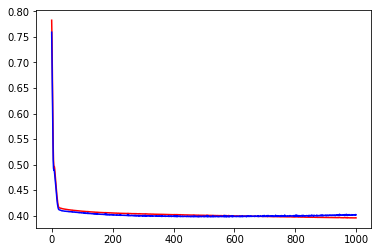

In [11]:
plt.plot(a,'r', b, 'b')
plt.show()

In [12]:
PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining3.pt'
initial = X2.shape[1]
final = int(round(initial * 1.5, 0)) 
device = torch.device('cpu')
net = Net1(initial, final)
net.load_state_dict(torch.load(PATH, map_location = device))

In [14]:
with torch.no_grad():
    val_inputs = torch.FloatTensor(X2_val.values)
    val_labels = torch.FloatTensor(Y_valp.values)
    val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
    val_outputs = net.forward(val_inputs)
    val_loss = criterion(val_outputs, val_labels) 
    print(val_loss.item())

0.3974575102329254


In [15]:
val_outputs = val_outputs.numpy()
val_labels = val_labels.numpy()

In [16]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.8018710680001002


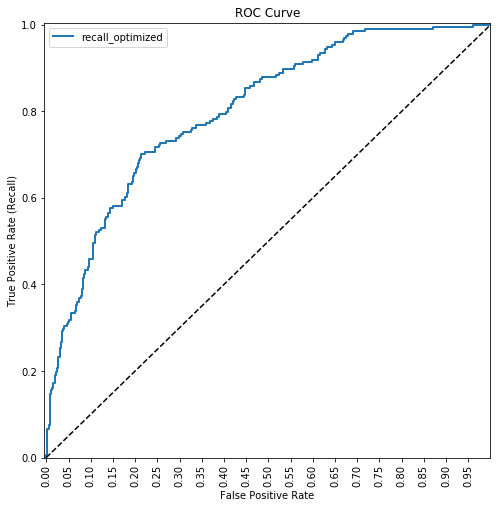

In [17]:
fpr, tpr, auc_thresholds = roc_curve(val_labels, val_outputs)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

## Regression

In [5]:
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\dep')
data2 = data[data.cost>0]
data_val2 = data_val[data_val.cost>0]
X_l = data2.iloc[:,1:]
Y_l = data2.iloc[:,0]
Xval_l = data_val2.iloc[:,1:]
Yval_l = data_val2.iloc[:,0]

ranking = np.load('ranking.npy')

my_index = X_l.columns.values[ranking]
X_l2 = X_l[my_index].copy()
X_l2['intercept'] = 1

Xval_l2 = Xval_l[my_index].copy()
Xval_l2['intercept'] = 1

In [6]:
np.var(data2.cost)

950487.0221827454

In [21]:
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\prog_calc')
from fit4_nn import fit

In [42]:
class Net1(nn.Module):
    def __init__(self, initial, final):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(initial, final)
        self.fc2 = nn.Linear(final, 1)                
                   
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

In [43]:
criterion = nn.MSELoss()

In [47]:
initial = X_l2.shape[1]
final = int(round(initial * 1.5, 0)) 

In [69]:
n_epochs = 300
lr = 0.01
verbose = 1
n_batches = 6
batch_to_avg = 2
clipping = 0.5
PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining4.pt'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [70]:
#net = Net1(initial, final)
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)  #1184807.875

PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining4.pt'
net.load_state_dict(torch.load(PATH, map_location = device))
    
a, b, c = fit(X_l2, Xval_l2, Y_l, Yval_l, net, optimizer, criterion, n_epochs, 
                        n_batches, batch_to_avg, lr, clipping, PATH, device, verbose) 

Epoch 1: Training Loss: 950488.5989583334, Validation Loss: 1184869.125
New Checkpoint Saved into PATH
Epoch 2: Training Loss: 950488.3333333334, Validation Loss: 1184880.25
Epoch 3: Training Loss: 950487.3958333334, Validation Loss: 1184891.25
Epoch 4: Training Loss: 950486.3229166666, Validation Loss: 1184906.125
Epoch 5: Training Loss: 950486.75, Validation Loss: 1184927.875
Epoch 6: Training Loss: 950489.0885416666, Validation Loss: 1184945.875
Epoch 7: Training Loss: 950487.1614583334, Validation Loss: 1184957.125
Epoch 8: Training Loss: 950486.9270833334, Validation Loss: 1184963.0
Epoch 9: Training Loss: 950487.0729166666, Validation Loss: 1184960.375
Epoch 10: Training Loss: 950488.6875, Validation Loss: 1184956.625
Epoch 11: Training Loss: 950487.6458333334, Validation Loss: 1184969.5
Epoch 12: Training Loss: 950487.1145833334, Validation Loss: 1184967.5
Epoch 13: Training Loss: 950487.6041666666, Validation Loss: 1184958.875
Epoch 14: Training Loss: 950487.1510416666, Validat

Epoch 118: Training Loss: 950490.8125, Validation Loss: 1185112.75
Epoch 119: Training Loss: 950489.734375, Validation Loss: 1185110.125
Epoch 120: Training Loss: 950489.703125, Validation Loss: 1185100.875
Epoch 121: Training Loss: 950488.765625, Validation Loss: 1185101.375
Epoch 122: Training Loss: 950489.1770833334, Validation Loss: 1185103.875
Epoch 123: Training Loss: 950489.4375, Validation Loss: 1185094.0
Epoch 124: Training Loss: 950488.7083333334, Validation Loss: 1185094.0
Epoch 125: Training Loss: 950488.9869791666, Validation Loss: 1185096.375
Epoch 126: Training Loss: 950489.0989583334, Validation Loss: 1185105.25
Epoch 127: Training Loss: 950489.2083333334, Validation Loss: 1185104.625
Epoch 128: Training Loss: 950489.0520833334, Validation Loss: 1185101.875
Epoch 129: Training Loss: 950488.6927083334, Validation Loss: 1185096.875
Epoch 130: Training Loss: 950489.15625, Validation Loss: 1185081.875
Epoch 131: Training Loss: 950489.4375, Validation Loss: 1185059.125
Epoch

Epoch 235: Training Loss: 950489.7395833334, Validation Loss: 1185141.625
Epoch 236: Training Loss: 950490.0416666666, Validation Loss: 1185156.875
Epoch 237: Training Loss: 950491.7552083334, Validation Loss: 1185169.875
Epoch 238: Training Loss: 950491.203125, Validation Loss: 1185167.75
Epoch 239: Training Loss: 950492.484375, Validation Loss: 1185154.125
Epoch 240: Training Loss: 950491.1822916666, Validation Loss: 1185147.25
Epoch 241: Training Loss: 950490.3333333334, Validation Loss: 1185153.625
Epoch 242: Training Loss: 950491.3802083334, Validation Loss: 1185160.125
Epoch 243: Training Loss: 950490.8541666666, Validation Loss: 1185168.0
Epoch 244: Training Loss: 950491.0364583334, Validation Loss: 1185171.75
Epoch 245: Training Loss: 950491.1458333334, Validation Loss: 1185186.0
Epoch 246: Training Loss: 950491.6927083334, Validation Loss: 1185189.25
Epoch 247: Training Loss: 950492.40625, Validation Loss: 1185203.625
Epoch 248: Training Loss: 950492.3958333334, Validation Los

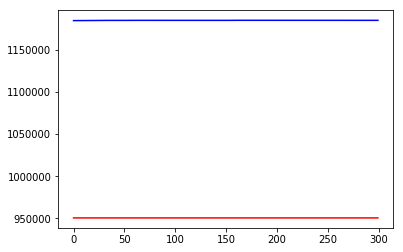

In [71]:
plt.plot(a,'r', b, 'b')
plt.show()

In [72]:
PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining4.pt'
initial = X_l2.shape[1]
final = int(round(initial * 1.5, 0)) 
device = torch.device('cpu')
net = Net1(initial, final)
net.load_state_dict(torch.load(PATH, map_location = device))

In [73]:
with torch.no_grad():
    val_inputs = torch.FloatTensor(Xval_l2.values)
    val_labels = torch.FloatTensor(Yval_l.values)
    val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
    val_outputs = net.forward(val_inputs)
    val_loss = criterion(val_outputs, val_labels) 
    print(val_loss.item())

1184869.0


In [74]:
val_outputs = val_outputs.numpy()
val_labels = val_labels.numpy()

In [75]:
RMSE = np.sqrt(np.mean((val_labels - val_outputs)**2))
RMSE

1088.5168